# Mission 6 : Optimisation de l’Économie Virtuelle

In [1]:
import pandas as pd

# Charger les données
df = pd.read_csv('game_data_complete.csv', sep=',', keep_default_na=False, na_values=['', 'NULL'])

# 1. Identifiez les joueurs qui dépensent régulièrement et ceux qui ne dépensent pas.

# On calcule la moyenne des achats par joueur
mean_purchases = df.groupby('ID_Joueur')['Achats_Objets'].mean()

# On identifie les joueurs qui dépensent régulièrement
regular_spenders = mean_purchases[mean_purchases >= mean_purchases.median()].index

# On identifie les joueurs qui ne dépensent peu
non_spenders = mean_purchases[mean_purchases < mean_purchases.median()].index

print("Joueurs qui dépensent régulièrement :", regular_spenders)
print("Joueurs qui ne dépensent pas :", non_spenders)

# On ajoute une colonne 'Dépensier' pour identifier les joueurs qui ont déjà dépensé
df['Dépensier'] = df['ID_Joueur'].isin(regular_spenders)

print(df['Dépensier'].value_counts())
print(df['Achats_Objets'].value_counts())

Joueurs qui dépensent régulièrement : Index([1002, 1003, 1006, 1008, 1010, 1012, 1013, 1015, 1022, 1027,
       ...
       1951, 1964, 1972, 1973, 1975, 1985, 1986, 1989, 1993, 1999],
      dtype='int64', name='ID_Joueur', length=272)
Joueurs qui ne dépensent pas : Index([1001, 1005, 1014, 1019, 1021, 1023, 1026, 1037, 1046, 1049,
       ...
       1954, 1960, 1963, 1965, 1977, 1978, 1980, 1991, 1995, 1998],
      dtype='int64', name='ID_Joueur', length=228)
Dépensier
True     8160
False    6840
Name: count, dtype: int64
Achats_Objets
0      8952
50     3084
100    1501
200     739
500     724
Name: count, dtype: int64


     ID_Joueur  Achats_Objets  Dépensier
0         1001           1300        0.0
1         1002           1700        1.0
2         1003           1500        1.0
3         1005           1050        0.0
4         1006           1800        1.0
..         ...            ...        ...
495       1991            750        0.0
496       1993           2500        1.0
497       1995           1350        0.0
498       1998           1050        0.0
499       1999           2650        1.0

[500 rows x 3 columns]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


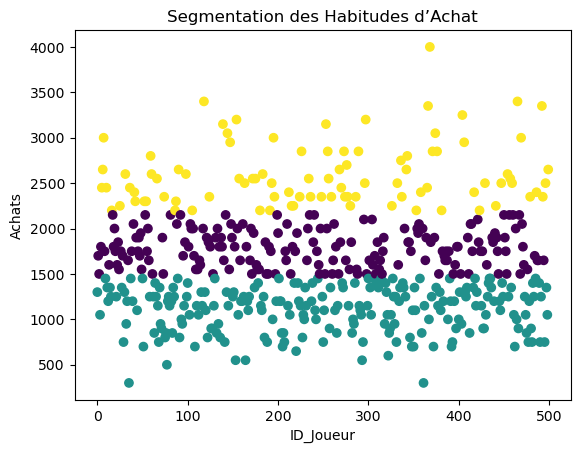

In [3]:
# 2. Préparez une segmentation en fonction des habitudes d’achat.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# On regroupe les achats par joueur
group_players = df.set_index('ID_Joueur').groupby('ID_Joueur').agg({'Achats_Objets': 'sum', 'Dépensier': 'mean'})
group_players = group_players.reset_index()
print(group_players)

# On standardise les données
X = group_players[["Achats_Objets", "Dépensier"]]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# On entraîne le modèle KMeans
model = KMeans(n_clusters=3)
model.fit(X)

# On fait le graphique
import matplotlib.pyplot as plt
plt.scatter(x=group_players.index, y=group_players['Achats_Objets'], c=model.labels_, cmap='viridis')
plt.xlabel('ID_Joueur')
plt.ylabel('Achats')
plt.title('Segmentation des Habitudes d’Achat')
plt.show()